In [ ]:

import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from google.colab import files
import pandas as pd
from tensorflow import keras
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Dense
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras import layers 


In [ ]:
from keras.datasets import cifar10
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()
X_train, X_valid, Y_train, Y_valid = train_test_split(X_train, Y_train, test_size = 0.2, shuffle = True, stratify = Y_train)


170500096/170498071 [==============================] - 11s 0us/step


In [ ]:
print('Train : X shape : {}, Y shape : {}'.format(X_train.shape, Y_train.shape))
print('Valid : X shape : {}, Y shape : {}'.format(X_valid.shape, Y_valid.shape))
print('Test : X shape : {}, Y shape : {}'.format(X_test.shape, Y_test.shape))


Train : X shape : (40000, 32, 32, 3), Y shape : (40000, 1)
Valid : X shape : (10000, 32, 32, 3), Y shape : (10000, 1)
Test : X shape : (10000, 32, 32, 3), Y shape : (10000, 1)


In [ ]:
X_train.shape

(40000, 32, 32, 3)

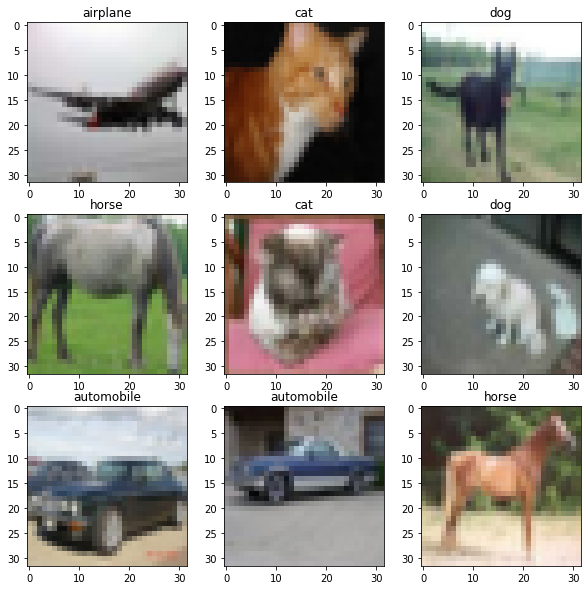

In [ ]:
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
plt.figure(figsize = (10, 10))
for i in range(9):
  plt.subplot(330 + 1 + i)
  plt.title(labels[Y_train[i][0]])
  plt.imshow(X_train[i])
plt.show()

In [ ]:
#Preprocessing

# one-hot encoding the outouts
from keras.utils import np_utils
y_train = np_utils.to_categorical(Y_train)
y_test = np_utils.to_categorical(Y_test)
y_valid = np_utils.to_categorical(Y_valid)

# normalizing pixel datas from [0, 255] to [0, 1]
x_train = X_train.astype('float32')
x_test = X_test.astype('float32')
x_valid = X_valid.astype('float32')

x_train = x_train / 255
x_test = x_test / 255
x_valid = x_valid / 255


In [ ]:
# creating the model

model = Sequential()

# model.add(layers.Conv2D(filters=16, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)))

# layer one
model.add(layers.Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(32, 32, 3))) 
model.add(layers.Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(32, 32, 3))) 
model.add(layers.MaxPooling2D(pool_size = (2,2), strides = None, padding = 'valid', data_format = None))
model.add(layers.Dropout(0.2))

# layer two
model.add(layers.Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(32, 32, 3))) 
model.add(layers.Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(32, 32, 3))) 
model.add(layers.MaxPooling2D(pool_size = (2,2), strides = None, padding = 'valid', data_format = None))
model.add(layers.Dropout(0.2))


#layer three
model.add(layers.Conv2D(filters=128, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(32, 32, 3))) 
model.add(layers.Conv2D(filters=128, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(32, 32, 3))) 
model.add(layers.MaxPooling2D(pool_size = (2,2), strides = None, padding = 'valid', data_format = None))
model.add(layers.Dropout(0.3))

model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu', input_shape = (256, )))
model.add(layers.Dense(256, activation='relu', input_shape = (256, )))
model.add(layers.Dropout(0.1))
model.add(layers.Dense(10))
model.add(layers.LeakyReLU(0.1))
model.add(layers.Activation('softmax'))
model.summary()
model.compile(optimizer = 'Adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0

In [ ]:
# Training

history = model.fit(x_train, y_train, batch_size=128, epochs=17, validation_data=(x_valid, y_valid))


Epoch 1/17
313/313 [==============================] - 13s 34ms/step - loss: 1.9905 - accuracy: 0.2510 - val_loss: 1.5082 - val_accuracy: 0.4551
Epoch 2/17
313/313 [==============================] - 10s 32ms/step - loss: 1.3940 - accuracy: 0.4920 - val_loss: 1.1799 - val_accuracy: 0.5743
Epoch 3/17
313/313 [==============================] - 10s 32ms/step - loss: 1.1475 - accuracy: 0.5874 - val_loss: 0.9846 - val_accuracy: 0.6535
Epoch 4/17
313/313 [==============================] - 10s 32ms/step - loss: 0.9751 - accuracy: 0.6496 - val_loss: 0.8944 - val_accuracy: 0.6799
Epoch 5/17
313/313 [==============================] - 10s 32ms/step - loss: 0.8653 - accuracy: 0.6959 - val_loss: 0.8033 - val_accuracy: 0.7148
Epoch 6/17
313/313 [==============================] - 10s 32ms/step - loss: 0.7917 - accuracy: 0.7231 - val_loss: 0.7883 - val_accuracy: 0.7230
Epoch 7/17
313/313 [==============================] - 10s 32ms/step - loss: 0.7207 - accuracy: 0.7446 - val_loss: 0.6977 - val_accuracy:

 Accuracy on Test set: 0.7838


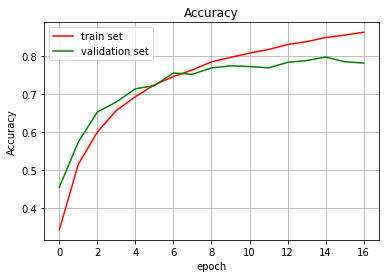

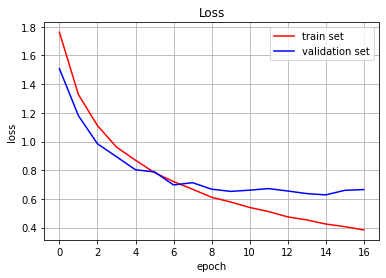

In [ ]:
# model accuracy on test data
y_pred = model.predict(x_test)
pred_labels = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)
success_num = np.sum(pred_labels == y_true) 
accuracy = float(success_num)/y_pred.shape[0]
print(" Accuracy on Test set: {}".format(accuracy))
# Accuracy Plots
fig = plt.figure()
plt.plot(history.history['accuracy'], 'r')
plt.plot(history.history['val_accuracy'], 'g')
plt.title('Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['train set', 'validation set'])
plt.grid()


# Loss Plots
fig = plt.figure()
plt.plot(history.history['loss'],'r')
plt.plot(history.history['val_loss'],'b')
plt.title('Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train set', 'validation set'])
plt.grid()

In [ ]:
#trying different number of layers
# creating the model

model2 = Sequential()

# model.add(layers.Conv2D(filters=16, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)))

# layer one
model2.add(layers.Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(32, 32, 3))) 
model2.add(layers.Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(32, 32, 3))) 
model2.add(layers.MaxPooling2D(pool_size = (2,2), strides = None, padding = 'valid', data_format = None))
model2.add(layers.Dropout(0.2))

# lay2er two
model2.add(layers.Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(32, 32, 3))) 
model2.add(layers.Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(32, 32, 3))) 
model2.add(layers.MaxPooling2D(pool_size = (2,2), strides = None, padding = 'valid', data_format = None))
model2.add(layers.Dropout(0.2))

#laye2r three
model2.add(layers.Conv2D(filters=128, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(32, 32, 3))) 
model2.add(layers.Conv2D(filters=128, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(32, 32, 3))) 
model2.add(layers.MaxPooling2D(pool_size = (2,2), strides = None, padding = 'valid', data_format = None))
model2.add(layers.Dropout(0.2))

model2.add(layers.Flatten())
model2.add(layers.Dense(256, activation='relu', input_shape = (256, )))
model2.add(layers.Dense(256, activation='relu', input_shape = (256, )))
model2.add(layers.Dropout(0.1))
model2.add(layers.Dense(10))
model2.add(layers.LeakyReLU(0.1))
model2.add(layers.Activation('softmax'))
model2.summary()
model2.compile(optimizer = 'Adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 8, 8, 64)         

In [ ]:
history2 = model2.fit(x_train, y_train, batch_size=64, epochs=20, validation_data=(x_valid, y_valid))

Epoch 1/20
625/625 [==============================] - 6s 9ms/step - loss: 1.9888 - accuracy: 0.2541 - val_loss: 1.3345 - val_accuracy: 0.5081
Epoch 2/20
625/625 [==============================] - 5s 8ms/step - loss: 1.3149 - accuracy: 0.5213 - val_loss: 1.1321 - val_accuracy: 0.5935
Epoch 3/20
625/625 [==============================] - 5s 8ms/step - loss: 1.0620 - accuracy: 0.6199 - val_loss: 0.9003 - val_accuracy: 0.6821
Epoch 4/20
625/625 [==============================] - 5s 8ms/step - loss: 0.8940 - accuracy: 0.6857 - val_loss: 0.8287 - val_accuracy: 0.7112
Epoch 5/20
625/625 [==============================] - 5s 8ms/step - loss: 0.7900 - accuracy: 0.7213 - val_loss: 0.7852 - val_accuracy: 0.7299
Epoch 6/20
625/625 [==============================] - 5s 8ms/step - loss: 0.7144 - accuracy: 0.7500 - val_loss: 0.7470 - val_accuracy: 0.7405
Epoch 7/20
625/625 [==============================] - 5s 8ms/step - loss: 0.6548 - accuracy: 0.7689 - val_loss: 0.7504 - val_accuracy: 0.7371
Epoch 

Accuracy on Test: 0.7796


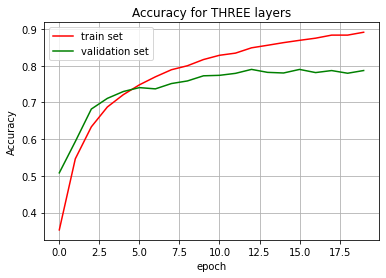

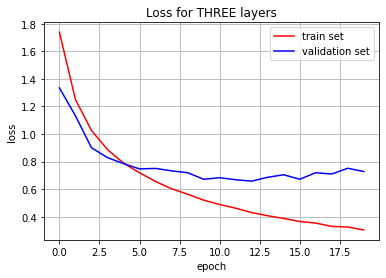

In [ ]:
# model accuracy on test data
y_pred = model2.predict(x_test)
pred_labels = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)
success_num = np.sum(pred_labels == y_true) 
accuracy = float(success_num)/y_pred.shape[0]
print("Accuracy on Test: {}".format(accuracy))
# Accuracy Plots
fig = plt.figure()
plt.plot(history2.history['accuracy'], 'r')
plt.plot(history2.history['val_accuracy'], 'g')
plt.title('Accuracy for THREE layers')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['train set', 'validation set'])
plt.grid()


# Loss Plots
fig = plt.figure()
plt.plot(history2.history['loss'],'r')
plt.plot(history2.history['val_loss'],'b')
plt.title('Loss for THREE layers')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train set', 'validation set'])
plt.grid()

In [ ]:
# trying out different activation functions
activations = ["relu", "tanh", "sigmoid"]
def create_model(activation_):
  model_ = Sequential()
  model_.add(layers.Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation=activation_, input_shape=(32, 32, 3))) 
  model_.add(layers.Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation=activation_, input_shape=(32, 32, 3))) 
  model_.add(layers.MaxPooling2D(pool_size = (2,2), strides = None, padding = 'valid', data_format = None))
  model_.add(layers.Dropout(0.2))

  model_.add(layers.Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation=activation_, input_shape=(32, 32, 3))) 
  model_.add(layers.Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation=activation_, input_shape=(32, 32, 3))) 
  model_.add(layers.MaxPooling2D(pool_size = (2,2), strides = None, padding = 'valid', data_format = None))
  model_.add(layers.Dropout(0.2))


  model_.add(layers.Conv2D(filters=128, kernel_size=(3, 3), padding='same', activation=activation_, input_shape=(32, 32, 3)))
  model_.add(layers.Conv2D(filters=128, kernel_size=(3, 3), padding='same', activation=activation_, input_shape=(32, 32, 3))) 
  model_.add(layers.MaxPooling2D(pool_size = (2,2), strides = None, padding = 'valid', data_format = None))
  model_.add(layers.Dropout(0.2))
  
  model_.add(layers.Flatten())
  model_.add(layers.Dense(256, activation=activation_, input_shape = (256, )))
  model_.add(layers.Dense(256, activation=activation_, input_shape = (256, )))
  model_.add(layers.Dropout(0.1))
  model_.add(layers.Dense(10))
  model_.add(layers.LeakyReLU(0.1))
  model_.add(layers.Activation('softmax'))
  model_.summary()
  model_.compile(optimizer = 'Adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

  return model_
models =[]
history = []
for activation in activations:
  new_model = create_model(activation)
  new_hist = new_model.fit(x_train, y_train, batch_size=128, epochs=10, validation_data=(x_valid, y_valid))
  models.append(new_model)
  history.append(new_hist)


Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_16 (Dropout)         (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 8, 8, 64)         

Accuracy on Test for activation [relu]: 0.762
Accuracy on Test for activation [tanh]: 0.7509
Accuracy on Test for activation [sigmoid]: 0.1


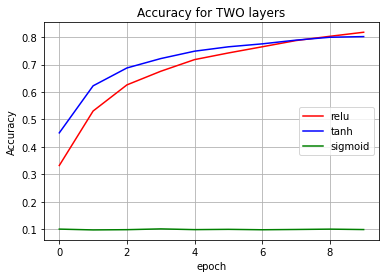

In [ ]:
## continuing trying out different activation functions

# model accuracy on test data

def get_accuracy(model):
  y_pred = model.predict(x_test)
  pred_labels = np.argmax(y_pred, axis=1)
  y_true = np.argmax(y_test, axis=1)
  success_num = np.sum(pred_labels == y_true) 
  accuracy = float(success_num)/y_pred.shape[0]
  return accuracy

for i in range(len(models)):
  print("Accuracy on Test for activation [{}]: {}".format(activations[i], get_accuracy(models[i])))
# Accuracy Plots for train set
fig = plt.figure()
plt.plot(history[0].history['accuracy'], 'r')
plt.plot(history[1].history['accuracy'], 'b')
plt.plot(history[2].history['accuracy'], 'g')
plt.title('Accuracy on Train Set')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend([activations[0], activations[1], activations[2]])
plt.grid()

# Accuracy Plots for val set
fig = plt.figure()
plt.plot(history[0].history['accuracy'], 'r')
plt.plot(history[1].history['accuracy'], 'b')
plt.plot(history[2].history['accuracy'], 'g')
plt.title('Accuracy on Validation Set')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend([activations[0], activations[1], activations[2]])
plt.grid()

In [ ]:
# trying out different optimizers
optimizers = ["adam", "SGD"]
def create_model(activation_):
  model_ = Sequential()
  model_.add(layers.Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation="relu", input_shape=(32, 32, 3))) 
  model_.add(layers.Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation="relu", input_shape=(32, 32, 3))) 
  model_.add(layers.MaxPooling2D(pool_size = (2,2), strides = None, padding = 'valid', data_format = None))
  model_.add(layers.Dropout(0.2))

  model_.add(layers.Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation="relu", input_shape=(32, 32, 3))) 
  model_.add(layers.Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation="relu", input_shape=(32, 32, 3))) 
  model_.add(layers.MaxPooling2D(pool_size = (2,2), strides = None, padding = 'valid', data_format = None))
  model_.add(layers.Dropout(0.2))


  model_.add(layers.Conv2D(filters=128, kernel_size=(3, 3), padding='same', activation="relu", input_shape=(32, 32, 3)))
  model_.add(layers.Conv2D(filters=128, kernel_size=(3, 3), padding='same', activation="relu", input_shape=(32, 32, 3))) 
  model_.add(layers.MaxPooling2D(pool_size = (2,2), strides = None, padding = 'valid', data_format = None))
  model_.add(layers.Dropout(0.2))
  
  model_.add(layers.Flatten())
  model_.add(layers.Dense(256, activation="relu", input_shape = (256, )))
  model_.add(layers.Dense(256, activation="relu", input_shape = (256, )))
  model_.add(layers.Dropout(0.1))
  model_.add(layers.Dense(10))
  model_.add(layers.LeakyReLU(0.1))
  model_.add(layers.Activation('softmax'))
  model_.summary()
  model_.compile(optimizer = 'Adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

  return model_
models =[]
history = []
for activation in activations:
  new_model = create_model(activation)
  new_hist = new_model.fit(x_train, y_train, batch_size=128, epochs=10, validation_data=(x_valid, y_valid))
  models.append(new_model)
  history.append(new_hist)


Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_42 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_43 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_28 (Dropout)         (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_44 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_45 (Conv2D)           (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 8, 8, 64)         

Accuracy on Test for optimizer [adam]: 0.7763
Accuracy on Test for optimizer [SGD]: 0.772


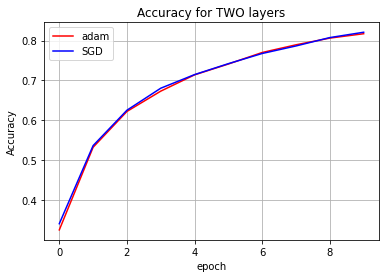

In [ ]:
## continuing trying out different optimizers

# model accuracy on test data

def get_accuracy(model):
  y_pred = model.predict(x_test)
  pred_labels = np.argmax(y_pred, axis=1)
  y_true = np.argmax(y_test, axis=1)
  success_num = np.sum(pred_labels == y_true) 
  accuracy = float(success_num)/y_pred.shape[0]
  return accuracy

for i in range(len(optimizers)):
  print("Accuracy on Test for optimizer [{}]: {}".format(optimizers[i], get_accuracy(models[i])))
# Accuracy Plots
fig = plt.figure()
plt.plot(history[0].history['accuracy'], 'r')
plt.plot(history[1].history['accuracy'], 'b')

plt.title('Accuracy for TWO layers')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend([optimizers[0], optimizers[1]])
plt.grid()

In [ ]:
np.argwhere(y_dataset== [10]).shape

(0, 2)

In [ ]:
Y_train.shape

(40000, 1)

In [ ]:
# reducing dataset >> 600 samples for each class
#reloading the whole dataset cuz we need to concatenate train and test sets
(X_train_, Y_train_), (X_test_, Y_test_) = cifar10.load_data()
x_dataset = np.concatenate((X_train_, X_test_), axis = 0 )
y_dataset = np.concatenate((Y_train_, Y_test_), axis = 0)

separated_classes_indices = np.array([])
# getting the indices for each class and storing them all in an array
# Note that we shuffle the indices before storing them
for i in range(len(labels)):    
  temp = np.array([x[0] for x in np.argwhere(y_dataset == [i])])
  np.random.shuffle(temp)
  separated_classes_indices = np.append(separated_classes_indices, np.array(temp[0:600]))    

x_dataset[0]
x = []
y = []

for j in range(len(separated_classes_indices)):
  x.append( x_dataset[int(separated_classes_indices[j])])
  y.append( y_dataset[int(separated_classes_indices[j])])

x = np.array(x)
y = np.array(y)


X_train_, X_test_, Y_train_, Y_test_ = train_test_split(x, y, test_size = 0.1, shuffle = True, stratify = y)
X_train_, X_valid_, Y_train_, Y_valid_ = train_test_split(X_train_, Y_train_, test_size = 0.1, shuffle = True, stratify = Y_train_)

#Preprocessing

# one-hot encoding the outouts
from keras.utils import np_utils
y_train_ = np_utils.to_categorical(Y_train_)
y_test_ = np_utils.to_categorical(Y_test_)
y_valid_ = np_utils.to_categorical(Y_valid_)

# normalizing pixel datas from [0, 255] to [0, 1]
x_train_ = X_train_.astype('float32')
x_test_ = X_test_.astype('float32')
x_valid_ = X_valid_.astype('float32')

x_train_ = x_train_ / 255
x_test_ = x_test_ / 255
x_valid_ = x_valid_ / 255

# creating the model

model4 = Sequential()

# model.add(layers.Conv2D(filters=16, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)))

# layer one
model4.add(layers.Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(32, 32, 3))) 
model4.add(layers.Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(32, 32, 3))) 
model4.add(layers.MaxPooling2D(pool_size = (2,2), strides = None, padding = 'valid', data_format = None))
model4.add(layers.Dropout(0.2))

# layer two
model4.add(layers.Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(32, 32, 3))) 
model4.add(layers.Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(32, 32, 3))) 
model4.add(layers.MaxPooling2D(pool_size = (2,2), strides = None, padding = 'valid', data_format = None))
model4.add(layers.Dropout(0.2))


#layer three
model4.add(layers.Conv2D(filters=128, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(32, 32, 3))) 
model4.add(layers.Conv2D(filters=128, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(32, 32, 3))) 
model4.add(layers.MaxPooling2D(pool_size = (2,2), strides = None, padding = 'valid', data_format = None))
model4.add(layers.Dropout(0.3))

model4.add(layers.Flatten())
model4.add(layers.Dense(256, activation='relu', input_shape = (256, )))
model4.add(layers.Dense(256, activation='relu', input_shape = (256, )))
model4.add(layers.Dropout(0.1))
model4.add(layers.Dense(10))
model4.add(layers.LeakyReLU(0.1))
model4.add(layers.Activation('softmax'))
model4.summary()
model4.compile(optimizer = 'Adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])


Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_48 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_49 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_32 (Dropout)         (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_50 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_51 (Conv2D)           (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 8, 8, 64)         

In [ ]:
history4 = model4.fit(x_train_, y_train_, batch_size=128, epochs=17, validation_data=(x_valid_, y_valid_))


Epoch 1/17
38/38 [==============================] - 27s 692ms/step - loss: 2.3008 - accuracy: 0.1160 - val_loss: 2.2307 - val_accuracy: 0.1630
Epoch 2/17
38/38 [==============================] - 26s 690ms/step - loss: 2.1465 - accuracy: 0.2111 - val_loss: 1.9680 - val_accuracy: 0.2963
Epoch 3/17
38/38 [==============================] - 26s 683ms/step - loss: 1.9122 - accuracy: 0.2997 - val_loss: 2.0019 - val_accuracy: 0.2722
Epoch 4/17
38/38 [==============================] - 26s 676ms/step - loss: 1.8223 - accuracy: 0.3371 - val_loss: 1.7155 - val_accuracy: 0.3630
Epoch 5/17
38/38 [==============================] - 26s 684ms/step - loss: 1.6495 - accuracy: 0.4000 - val_loss: 1.6214 - val_accuracy: 0.4111
Epoch 6/17
38/38 [==============================] - 26s 685ms/step - loss: 1.5550 - accuracy: 0.4222 - val_loss: 1.5379 - val_accuracy: 0.4370
Epoch 7/17
38/38 [==============================] - 26s 679ms/step - loss: 1.4752 - accuracy: 0.4304 - val_loss: 1.5095 - val_accuracy: 0.4259

 Accuracy on Test set: 0.56


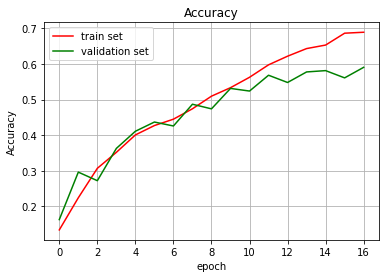

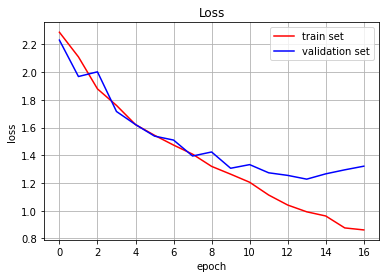

In [ ]:
# model accuracy on test data
y_pred_ = model4.predict(x_test_)
pred_labels = np.argmax(y_pred_, axis=1)
y_true_ = np.argmax(y_test_, axis=1)
success_num = np.sum(pred_labels == y_true_) 
accuracy = float(success_num)/y_pred_.shape[0]


print(" Accuracy on Test set: {}".format(accuracy))
# Accuracy Plots
fig = plt.figure()
plt.plot(history4.history['accuracy'], 'r')
plt.plot(history4.history['val_accuracy'], 'g')
plt.title('Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['train set', 'validation set'])
plt.grid()


# Loss Plots
fig = plt.figure()
plt.plot(history4.history['loss'],'r')
plt.plot(history4.history['val_loss'],'b')
plt.title('Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train set', 'validation set'])
plt.grid()

In [ ]:
#using 1 convolution layer instead of 2 stacked together
# creating the model

model3 = Sequential()

# layer one
model3.add(layers.Conv2D(filters=32, kernel_size=(5, 5), padding='same', activation='relu', input_shape=(32, 32, 3))) 
# model3.add(layers.Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(32, 32, 3))) 
model3.add(layers.MaxPooling2D(pool_size = (2,2), strides = None, padding = 'valid', data_format = None))
model3.add(layers.Dropout(0.2))

# lay2er two
model3.add(layers.Conv2D(filters=64, kernel_size=(5, 5), padding='same', activation='relu', input_shape=(32, 32, 3))) 
# model3.add(layers.Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(32, 32, 3))) 
model3.add(layers.MaxPooling2D(pool_size = (2,2), strides = None, padding = 'valid', data_format = None))
model3.add(layers.Dropout(0.2))

#laye2r three
model3.add(layers.Conv2D(filters=128, kernel_size=(5, 5), padding='same', activation='relu', input_shape=(32, 32, 3))) 
# model3.add(layers.Conv2D(filters=128, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(32, 32, 3))) 
model3.add(layers.MaxPooling2D(pool_size = (2,2), strides = None, padding = 'valid', data_format = None))
model3.add(layers.Dropout(0.2))

model3.add(layers.Flatten())
model3.add(layers.Dense(256, activation='relu', input_shape = (256, )))
model3.add(layers.Dense(256, activation='relu', input_shape = (256, )))
model3.add(layers.Dropout(0.1))
model3.add(layers.Dense(10))
model3.add(layers.LeakyReLU(0.1))
model3.add(layers.Activation('softmax'))
model3.summary()
model3.compile(optimizer = 'Adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 32, 32, 32)        2432      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 64)        51264     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 8, 8, 128)        

In [ ]:
history3 = model3.fit(x_train, y_train, batch_size=64, epochs=20, validation_data=(x_valid, y_valid))

Epoch 1/20
625/625 [==============================] - 5s 7ms/step - loss: 1.8975 - accuracy: 0.2840 - val_loss: 1.3110 - val_accuracy: 0.5258
Epoch 2/20
625/625 [==============================] - 4s 6ms/step - loss: 1.2633 - accuracy: 0.5487 - val_loss: 1.0818 - val_accuracy: 0.6185
Epoch 3/20
625/625 [==============================] - 4s 6ms/step - loss: 1.0600 - accuracy: 0.6257 - val_loss: 0.9642 - val_accuracy: 0.6646
Epoch 4/20
625/625 [==============================] - 4s 6ms/step - loss: 0.9261 - accuracy: 0.6738 - val_loss: 0.9007 - val_accuracy: 0.6814
Epoch 5/20
625/625 [==============================] - 4s 6ms/step - loss: 0.8414 - accuracy: 0.7019 - val_loss: 0.9086 - val_accuracy: 0.6842
Epoch 6/20
625/625 [==============================] - 4s 6ms/step - loss: 0.7806 - accuracy: 0.7283 - val_loss: 0.8084 - val_accuracy: 0.7154
Epoch 7/20
625/625 [==============================] - 4s 6ms/step - loss: 0.7108 - accuracy: 0.7504 - val_loss: 0.8166 - val_accuracy: 0.7213
Epoch 

 Accuracy on Test set: 0.7425


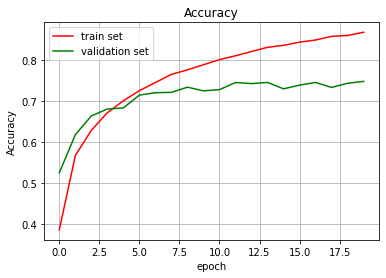

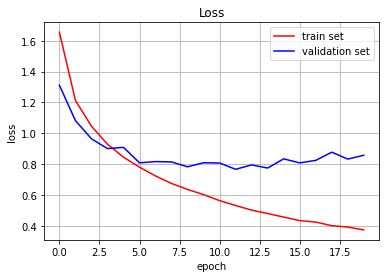

In [ ]:
# model accuracy on test data
y_pred = model3.predict(x_test)
pred_labels = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)
success_num = np.sum(pred_labels == y_true) 
accuracy = float(success_num)/y_pred.shape[0]
print(" Accuracy on Test set: {}".format(accuracy))
# Accuracy Plots
fig = plt.figure()
plt.plot(history3.history['accuracy'], 'r')
plt.plot(history3.history['val_accuracy'], 'g')
plt.title('Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['train set', 'validation set'])
plt.grid()


# Loss Plots
fig = plt.figure()
plt.plot(history3.history['loss'],'r')
plt.plot(history3.history['val_loss'],'b')
plt.title('Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train set', 'validation set'])
plt.grid()

In [ ]:
# Different dropout percentages
model = Sequential()

# model.add(layers.Conv2D(filters=16, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)))

# layer one
model.add(layers.Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(32, 32, 3))) 
model.add(layers.Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(32, 32, 3))) 
model.add(layers.MaxPooling2D(pool_size = (2,2), strides = None, padding = 'valid', data_format = None))
model.add(layers.Dropout(0.3))

# layer two
model.add(layers.Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(32, 32, 3))) 
model.add(layers.Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(32, 32, 3))) 
model.add(layers.MaxPooling2D(pool_size = (2,2), strides = None, padding = 'valid', data_format = None))
model.add(layers.Dropout(0.3))


#layer three
model.add(layers.Conv2D(filters=128, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(32, 32, 3))) 
model.add(layers.Conv2D(filters=128, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(32, 32, 3))) 
model.add(layers.Dropout(0.3))

model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu', input_shape = (256, )))
model.add(layers.Dense(256, activation='relu', input_shape = (256, )))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(10))
model.add(layers.LeakyReLU(0.1))
model.add(layers.Activation('softmax'))
model.summary()
model.compile(optimizer = 'Adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_72 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_73 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_48 (Dropout)         (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_74 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_75 (Conv2D)           (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 8, 8, 64)        

In [ ]:
# Training

history = model.fit(x_train, y_train, batch_size=128, epochs=17, validation_data=(x_valid, y_valid))


Epoch 1/17
313/313 [==============================] - 12s 35ms/step - loss: 2.0330 - accuracy: 0.2351 - val_loss: 1.5012 - val_accuracy: 0.4494
Epoch 2/17
313/313 [==============================] - 11s 34ms/step - loss: 1.3767 - accuracy: 0.4976 - val_loss: 1.1515 - val_accuracy: 0.5877
Epoch 3/17
313/313 [==============================] - 11s 34ms/step - loss: 1.1204 - accuracy: 0.6011 - val_loss: 1.0316 - val_accuracy: 0.6321
Epoch 4/17
313/313 [==============================] - 11s 34ms/step - loss: 0.9691 - accuracy: 0.6550 - val_loss: 0.9253 - val_accuracy: 0.6723
Epoch 5/17
313/313 [==============================] - 11s 34ms/step - loss: 0.8491 - accuracy: 0.7018 - val_loss: 0.8001 - val_accuracy: 0.7173
Epoch 6/17
313/313 [==============================] - 11s 34ms/step - loss: 0.7635 - accuracy: 0.7262 - val_loss: 0.8041 - val_accuracy: 0.7210
Epoch 7/17
313/313 [==============================] - 11s 34ms/step - loss: 0.6909 - accuracy: 0.7559 - val_loss: 0.7824 - val_accuracy:

 Accuracy on Test set: 0.7715


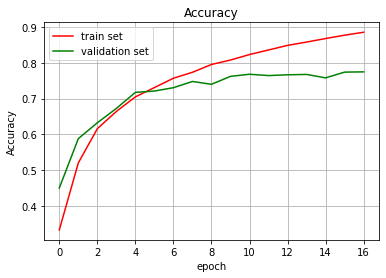

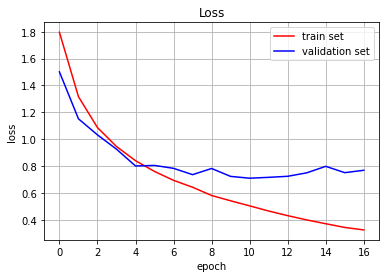

In [ ]:
# model accuracy on test data
y_pred = model.predict(x_test)
pred_labels = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)
success_num = np.sum(pred_labels == y_true) 
accuracy = float(success_num)/y_pred.shape[0]
print(" Accuracy on Test set: {}".format(accuracy))
# Accuracy Plots
fig = plt.figure()
plt.plot(history.history['accuracy'], 'r')
plt.plot(history.history['val_accuracy'], 'g')
plt.title('Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['train set', 'validation set'])
plt.grid()


# Loss Plots
fig = plt.figure()
plt.plot(history.history['loss'],'r')
plt.plot(history.history['val_loss'],'b')
plt.title('Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train set', 'validation set'])
plt.grid()